In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Defining model with w*x+b
class Model(object):
    def __init__(self):
        self.w = tf.Variable(3.0)
        self.b = tf.Variable(2.0)
    def __call__(self, x):
        return self.w*x+self.b

In [3]:
model = Model()

In [4]:
## Defining loss
def mae_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

In [5]:
## Creating synthetic training data
w_true = 2
b_true = 1
samples = 1000
x_true = tf.random.normal(shape=[samples])
y_true = w_true*x_true + b_true

In [6]:
def plot_data(inputs, outputs, predicted_outputs):
    real = plt.scatter(inputs, outputs, c='b')
    predicted = plt.scatter(inputs, predicted_outputs,c='r')
    plt.legend((real, predicted), ('Real Data', 'Predicted data'))
    plt.show()

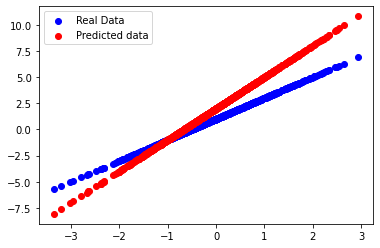

Before training, loss =  1.9186062


In [7]:
plot_data(x_true, y_true, model(x_true))
print('Before training, loss = ', mae_loss(model(x_true), y_true).numpy())

In [8]:
def train_data(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        loss = mae_loss(outputs, model(inputs))
    dw, db = tape.gradient(loss, [model.w, model.b])
    model.w.assign_sub(learning_rate*dw)
    model.b.assign_sub(learning_rate*db)
    return loss

In [9]:
losses = []
w_values = []
b_values = []
for _ in range(500):
    loss = train_data(model, x_true, y_true, learning_rate=0.01)
    losses.append(loss)
    w_values.append(model.w.numpy())
    b_values.append(model.b.numpy())
    print('epoch num ', _, w_values[-1], b_values[-1], loss.numpy())

epoch num  0 2.9809434 1.9806843 1.9186062
epoch num  1 2.96225 1.9617419 1.8456877
epoch num  2 2.9439125 1.9431655 1.7755414
epoch num  3 2.9259243 1.9249482 1.7080607
epoch num  4 2.9082787 1.9070829 1.643145
epoch num  5 2.8909693 1.8895628 1.5806963
epoch num  6 2.8739896 1.8723813 1.5206213
epoch num  7 2.8573334 1.8555318 1.46283
epoch num  8 2.8409944 1.8390079 1.4072347
epoch num  9 2.8249667 1.8228033 1.3537525
epoch num  10 2.8092442 1.8069117 1.302303
epoch num  11 2.7938213 1.7913272 1.252809
epoch num  12 2.7786922 1.7760439 1.205196
epoch num  13 2.7638514 1.761056 1.1593928
epoch num  14 2.749293 1.7463576 1.1153305
epoch num  15 2.7350123 1.7319431 1.0729424
epoch num  16 2.7210035 1.7178073 1.0321658
epoch num  17 2.7072616 1.7039446 0.99293876
epoch num  18 2.6937814 1.6903497 0.95520264
epoch num  19 2.680558 1.6770175 0.9189006
epoch num  20 2.6675866 1.6639428 0.88397825
epoch num  21 2.6548622 1.6511208 0.85038346
epoch num  22 2.6423802 1.6385465 0.81806505
epoc

epoch num  211 2.016863 1.0160642 0.00054073875
epoch num  212 2.0165412 1.0157545 0.0005201986
epoch num  213 2.0162256 1.0154507 0.0005004364
epoch num  214 2.0159159 1.0151528 0.0004814259
epoch num  215 2.0156121 1.0148606 0.00046313542
epoch num  216 2.015314 1.014574 0.000445541
epoch num  217 2.0150218 1.0142931 0.00042861182
epoch num  218 2.014735 1.0140175 0.00041232895
epoch num  219 2.0144536 1.0137472 0.0003966603
epoch num  220 2.0141778 1.0134822 0.00038158902
epoch num  221 2.0139072 1.0132222 0.00036709345
epoch num  222 2.0136416 1.0129673 0.00035314646
epoch num  223 2.0133812 1.0127174 0.0003397281
epoch num  224 2.013126 1.0124722 0.00032682263
epoch num  225 2.0128753 1.0122317 0.00031440778
epoch num  226 2.0126295 1.0119959 0.0003024627
epoch num  227 2.0123885 1.0117646 0.00029097113
epoch num  228 2.012152 1.0115378 0.00027991788
epoch num  229 2.01192 1.0113153 0.0002692817
epoch num  230 2.0116925 1.0110972 0.00025905104
epoch num  231 2.0114694 1.0108832 0.

epoch num  422 2.0002885 1.0002649 1.5296715e-07
epoch num  423 2.000283 1.0002598 1.470799e-07
epoch num  424 2.0002775 1.0002548 1.4149771e-07
epoch num  425 2.0002723 1.0002499 1.3607371e-07
epoch num  426 2.000267 1.0002451 1.3094937e-07
epoch num  427 2.000262 1.0002403 1.2597273e-07
epoch num  428 2.000257 1.0002357 1.2121146e-07
epoch num  429 2.000252 1.0002311 1.16595096e-07
epoch num  430 2.0002472 1.0002267 1.12126116e-07
epoch num  431 2.0002425 1.0002223 1.079147e-07
epoch num  432 2.000238 1.000218 1.03768635e-07
epoch num  433 2.0002334 1.0002139 9.987284e-08
epoch num  434 2.000229 1.0002097 9.609707e-08
epoch num  435 2.0002246 1.0002056 9.239478e-08
epoch num  436 2.0002203 1.0002017 8.891178e-08
epoch num  437 2.000216 1.0001978 8.554249e-08
epoch num  438 2.000212 1.000194 8.224403e-08
epoch num  439 2.000208 1.0001903 7.915037e-08
epoch num  440 2.0002038 1.0001866 7.615381e-08
epoch num  441 2.0002 1.000183 7.321894e-08
epoch num  442 2.0001962 1.0001794 7.047129e

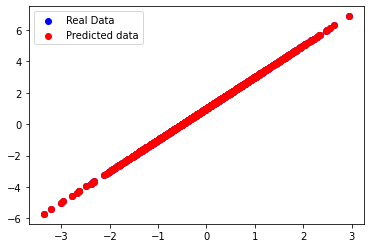

In [10]:
plot_data(x_true, y_true, model(x_true))

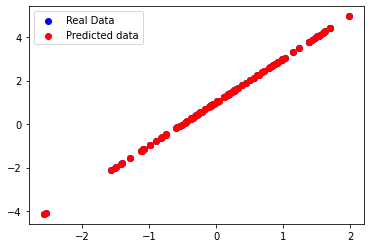

In [11]:
test_inputs = tf.random.normal(shape=[100])
test_outputs = test_inputs*w_true + b_true
y_test_predicted = model(test_inputs)
plot_data(test_inputs, test_outputs, y_test_predicted)

In [12]:
def plot_loss_for_weights(weights_list, losses):
    for id, weights in enumerate(weights_list):
        plt.subplot(120+id+1)
        plt.plot(weights['values'], losses, 'r')
        plt.plot(weights['values'], losses, 'bo')
        plt.xlabel(weights['name'])
        plt.ylabel('Loss')
        

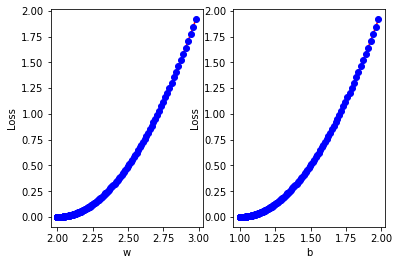

In [13]:
weights_list = [{'name':'w', 
                'values' : w_values},
                {'name': 'b', 
                 'values': b_values
                    
                }]
plot_loss_for_weights(weights_list, losses)